In [18]:
# Packages necessary for the project
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import numpy as np

In [19]:
# Defining the relevant constants
"""Choice of units: 
Energy – MeV
Time – s
Distance – m
Speed – m / s
Mass - MeV s^2 / m^2 (MeV / c^2)
Force – MeV / m
alpha – Mev / m^2
"""

stoptime = 1.7e-10
numpoints = 5000
t0 = np.linspace(0, stoptime, numpoints)
mc2 = 0.511 
F0 = 1e3
alpha = 5e6
c = 3e8
m = mc2 / c**2
E0 = np.sqrt(mc2 ** 2 + F0**2 * t0**2 * c ** 2) 
vx0 = F0 * t0 * c**2 / E0

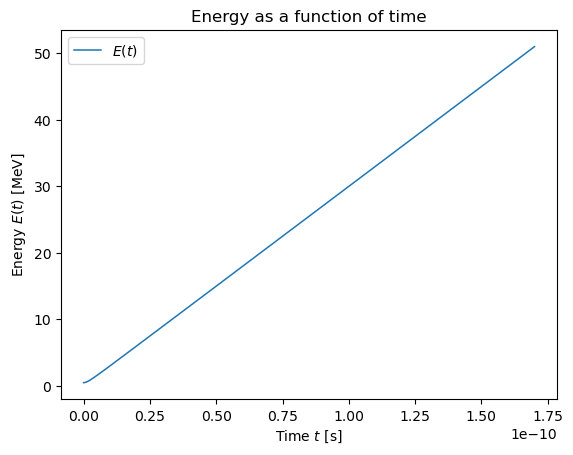

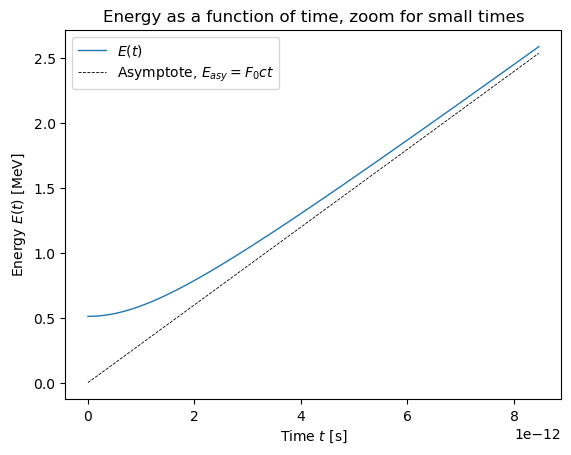

In [20]:
# Q18 – Plot of the energy E as a function of time

plt.plot(t0, E0, label=r'$E(t)$', linewidth=1.1)
plt.ylabel(r'Energy $E(t)$ [MeV]')
plt.xlabel(r'Time $t$ [s]')
plt.title(r'Energy as a function of time')
plt.legend()
plt.show()

# Q18 – Plot of the energy E as a function of time, zoomed

plt.plot(t0[:250], E0[:250], label=r'$E(t)$', linewidth=1)
plt.plot(t0[:250], (F0*t0*c)[:250], '--', label=r'Asymptote, $E_{asy}=F_{0} c t$', c='black', linewidth=0.6)
plt.ylabel(r'Energy $E(t)$ [MeV]')
plt.xlabel(r'Time $t$ [s]')
plt.title(r'Energy as a function of time, zoom for small times')
plt.legend()
plt.show()

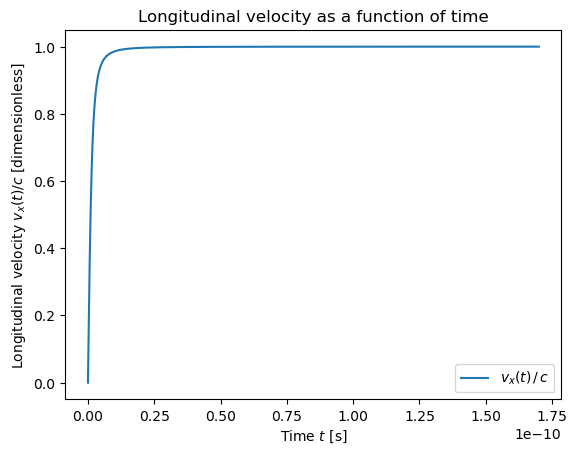

In [21]:
# Q18 – Plot of the beta factor v_x(t) / c
plt.plot(t0, vx0/c, label=r'$v_x(t)\,/\,c$')
plt.ylabel(r'Longitudinal velocity $v_x(t)/c$ [dimensionless]')
plt.xlabel(r'Time $t$ [s]')
plt.title(r'Longitudinal velocity as a function of time')
plt.legend()
plt.show()

In [22]:
# For all later parts

# reference on how to solve a system of coupled ODEs: 
# https://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html
def vectorfield(w, t, p):
    """
    Defines the differential equations for the acceleration of the electron close to c

    Arguments:
        w :  vector of the state variables:
                  w = [x,y,z,px,py,pz]
        t :  time
        p :  vector of the parameters:
                  p = [m,alpha,F0,c]
    """
    x, y, z, px, py, pz = w
    m, alpha, F0, c = p
    gamma = np.sqrt(1 + (px**2+py**2+pz**2)/(m**2*c**2))
    # Create the state vector f = (x', y', z', px', py', pz'):
    f = [px/(gamma*m),
         py/(gamma*m),
         pz/(gamma*m),
         F0,
         -alpha*y,
         -alpha*z]
    return f

In [23]:
# Initial conditions
# x0, y0, z0: initial positions
# px0, py0, pz0: initial components of the momentum
x0 = 0
y0 = 0
z0 = 0
px0 = 0
py0 = 0
pz0 = 0
p = [m, alpha, F0, c]
w0 = [x0, y0, z0, px0, py0, pz0]

# ODE solver parameters
abserr = 1.0e-16
relerr = 1.0e-6
dt = stoptime / numpoints
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

wsol = odeint(vectorfield, w0, t, args=(p,), atol=abserr, rtol=relerr)

with open('data.txt', 'w') as outfile:
    for t1, w1 in zip(t, wsol):
        outfile.write(', '.join([str(x) for x in [t1, w1[0], w1[1], w1[2], w1[3], w1[4], w1[5]]]) + '\n')

In [24]:
filling_values = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
data = np.genfromtxt('data.txt', delimiter=', ', filling_values=filling_values) 
t, x, y, z, px, py, pz = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6]
p = np.sqrt(px**2 + py**2 + pz**2)
E = np.sqrt(mc2**2 + c**2*p**2)

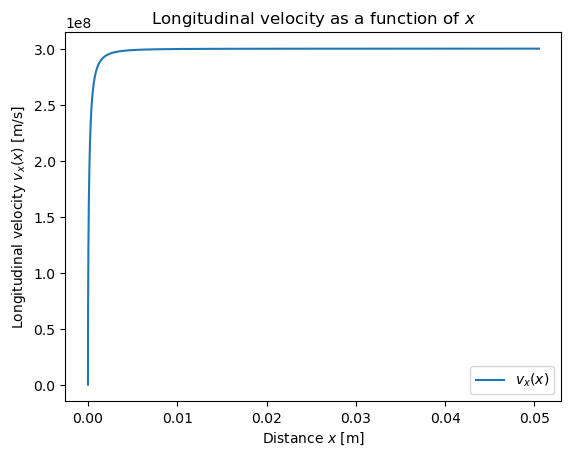

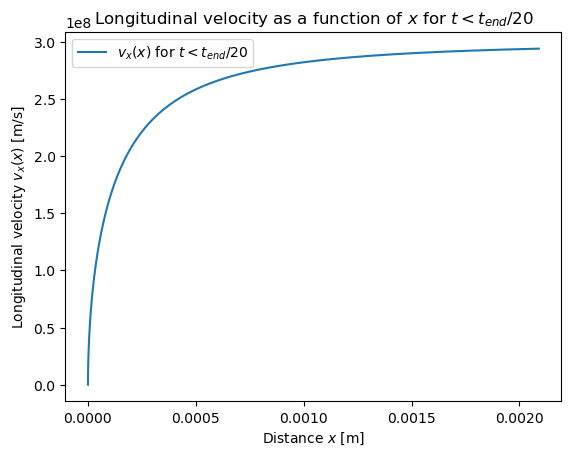

In [25]:
# Q19.1 - v_x(x) and zoom for t < t_end / 20

velocity_x = np.diff(np.concatenate(([0], x), axis=0)) / dt

plt.plot(x, velocity_x, label=r'$v_x(x)$')
plt.xlabel(r'Distance $x$ [m]')
plt.ylabel(r'Longitudinal velocity $v_x(x)$ [m/s]')
plt.title(r'Longitudinal velocity as a function of $x$')
plt.legend()
plt.show()

plt.plot(x[:numpoints//20+1], velocity_x[:numpoints//20+1], label=r'$v_x(x)$ for $t<t_{end} / 20$')
plt.xlabel(r'Distance $x$ [m]')
plt.ylabel(r'Longitudinal velocity $v_x(x)$ [m/s]')
plt.title(r'Longitudinal velocity as a function of $x$ for $t<t_{end}/20$')
plt.legend()
plt.show()

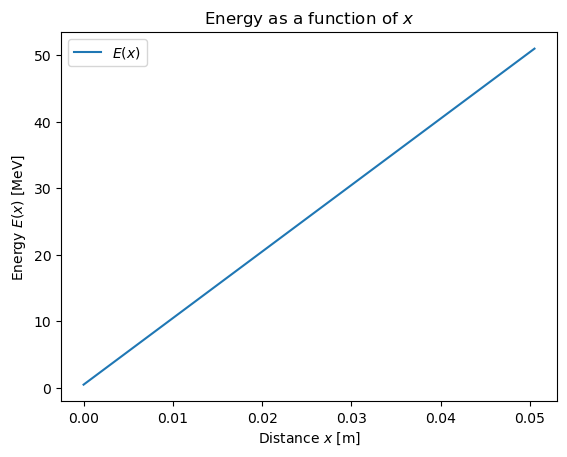

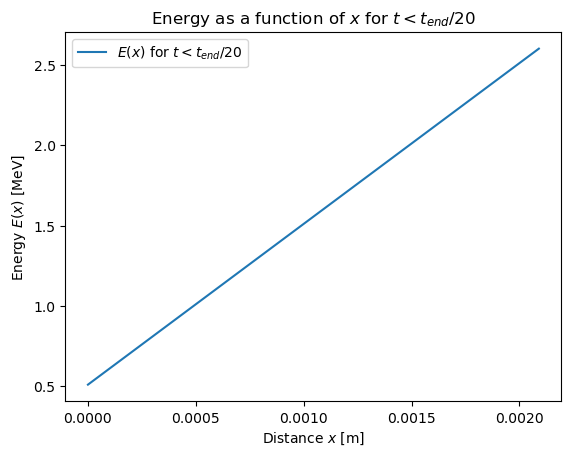

In [27]:
# Q19.1 - E(x) and zoom for t < t_end / 20

plt.plot(x, E, label=r'$E(x)$')
plt.xlabel(r'Distance $x$ [m]')
plt.ylabel(r'Energy $E(x)$ [MeV]')
plt.title(r'Energy as a function of $x$')
plt.legend()
plt.show()


plt.plot(x[:numpoints//20+1], E[:numpoints//20+1], label=r'$E(x)$ for $t<t_{end} / 20$')
plt.xlabel(r'Distance $x$ [m]')
plt.ylabel(r'Energy $E(x)$ [MeV]')
plt.title(r'Energy as a function of $x$ for $t<t_{end} / 20$')
plt.legend()
plt.show()